# Generalised Linear Model

#### This program develops a model that has been trained over a number of training examples (each of the examples having 4 features and 1 target value) and can subsequently predict the target value for any test input given. This is a linear regression problem and the learning algorithm used is Gradient Descent Method.

In [276]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

In [277]:
'''Arguments:
        Hypothesis matrix which is the set of predicted outputs
        Target matrix which is the set of actual outputs for the training data
        Number of training examples
    Returns:
        The value of cost function for a particular hypothesis function'''
def computeCostFunction(hyp, tar, m):
    sum = np.sum((hyp-tar)**2)
    cost = sum/(2*m)
    return cost

In [278]:
#The CSV files for training_data and test_input are converted to ndarrays
train_data = genfromtxt('.\\train_data.csv', delimiter = ",")
test_input = genfromtxt('.\\test_input.csv', delimiter = ",")

In [279]:
#The first row containing the column names is deleted from the train_data and test_input ndarrays
train_data = np.delete(train_data, (0), axis = 0)
test_input = np.delete(test_input, (0), axis = 0)

In [280]:
m = len(train_data) #Number of training examples
noOfFeatures = train_data.shape[1]-1
bias = np.ones(m)
train_data= np.insert(train_data, 0, bias, axis = 1) #First column of 1s is inserted


In [281]:
target = train_data[:,-1] #Extracting the last column
target = (np.array(target, ndmin = 2)).transpose()#Storing the target values in a separate vector
train_data = np.delete(train_data, noOfFeatures+1, axis = 1) #train_data now only contains the feature columns and the bias column

In [282]:
parameters = np.zeros([1, noOfFeatures+1])
parametersTranspose = parameters.transpose()#Parameters vector

In [283]:
hypothesis = np.dot(train_data, parametersTranspose) #h(x) = (train_data)*(Parameters vector)
differenceArray = np.subtract(hypothesis, target) #Each element of differenceArray = h(x(i))-y(i)

In [284]:
learningRate = 0.1 #Alpha
initialCost = computeCostFunction(hypothesis, target, m)
save = initialCost
costValuesArray = [save]
noOfIterations = [0]
iterNo = 0
randomWeights = [random.random() for i in range(noOfFeatures+1)]
updatedParameters = np.array(randomWeights, ndmin = 2) #The parameters are assigned random values in the beginning
print "%10s %12s" %("Iteration", "Cost")

while True:    
    updatedParameters = updatedParameters - (learningRate/m)*(np.dot(differenceArray.transpose(), train_data))    
    hypothesis = np.dot(train_data, updatedParameters.transpose())
    iterNo+=1
    print "%10d %e" %(iterNo, save)
    cost = computeCostFunction(hypothesis, target, m)    
    noOfIterations.append(iterNo)
    costValuesArray.append(cost)
    if abs(cost-save)<=0.001*save:
        break
    if cost>save:
        break
    else:
        save = cost
        differenceArray = np.subtract(hypothesis, target)
    

 Iteration         Cost
         1 1.045895e+01
         2 3.778883e+00
         3 2.444884e+00
         4 1.602147e+00
         5 1.069390e+00
         6 7.322301e-01
         7 5.184995e-01
         8 3.826636e-01
         9 2.959922e-01
        10 2.403580e-01
        11 2.043233e-01
        12 1.806713e-01
        13 1.648482e-01
        14 1.539806e-01
        15 1.462552e-01
        16 1.405277e-01
        17 1.360758e-01
        18 1.324436e-01
        19 1.293430e-01
        20 1.265920e-01
        21 1.240758e-01
        22 1.217213e-01
        23 1.194824e-01
        24 1.173297e-01
        25 1.152444e-01
        26 1.132145e-01
        27 1.112320e-01
        28 1.092919e-01
        29 1.073906e-01
        30 1.055257e-01
        31 1.036955e-01
        32 1.018987e-01
        33 1.001342e-01
        34 9.840117e-02
        35 9.669894e-02
        36 9.502683e-02
        37 9.338422e-02
        38 9.177055e-02
        39 9.018528e-02
        40 8.862789e-02
        41 8.709

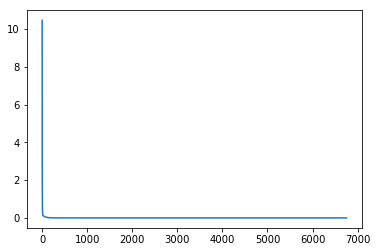

In [285]:
plt.plot(noOfIterations, costValuesArray) #Plot between cost function value(y axis) and no of iterations(x axis)

## Predicting for test input

In [286]:
bias = np.ones(len(test_input))
test_input= np.insert(test_input, 0, bias, axis = 1) #First column of 1s is inserted
predictedOutput = np.dot(test_input, updatedParameters.transpose()) 
#Predicted outputs are inserted as the last column in the test_input array
test_input = np.insert(test_input, noOfFeatures+1, predictedOutput.transpose(), axis = 1)
test_input = np.delete(test_input, 0, axis = 1) #First column of ones is deleted
output = pd.DataFrame(data = test_input, columns = ["Variable 1", "Variable 2", "Variable 3", "Variable 4", "Prediction"])
output.to_csv("test_output.csv", sep=',') #The feature columns and the predicted values are stored in a CSV file